
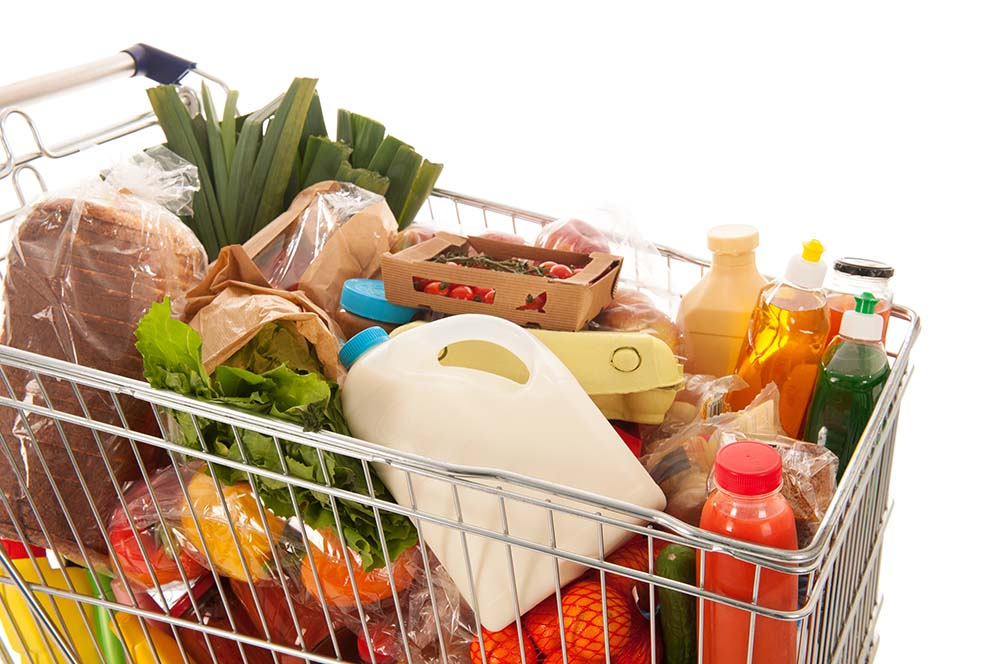

USING APRIORI ALGORITHM

In [ ]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
from collections import defaultdict


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Grocerries full.csv'
df = pd.read_csv(file_path)


In [ ]:
df.head(50)

,TID,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,1,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TID      9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
 10  Item 10  896 non-null    object
 11  Item 11  650 non-null    object
 12  Item 12  468 non-null    object
 13  Item 13  351 non-null    object
 14  Item 14  273 non-null    object
 15  Item 15  196 non-null    object
 16  Item 16  141 non-null    object
 17  Item 17  95 non-null     object
 18  Item 18  66 non-null     object
 19  Item 19  52 non-null     object
 20  Item 20  38 non-null     object
 21  Item 21  29 non-null     object
 22  

We have 9835 transactions

In [ ]:
df.describe()

,TID
count,9835.000000
mean,4918.000000
std,2839.264283
min,1.000000
25%,2459.500000
50%,4918.000000
75%,7376.500000
max,9835.000000


In [ ]:
#count of unique items
print(df.nunique())

We have 32 unique items

In [ ]:
# Drop TID column
items_df = df.drop(columns=["TID"])


In [ ]:
# Convert rows to list of items, dropping NaN
transactions = items_df.apply(lambda row: row.dropna().tolist(), axis=1).tolist()

In [ ]:
# Encode transactions
te = TransactionEncoder()
te_data = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_data, columns=te.columns_)

In [ ]:
# Apply Apriori and print frequent 1-itemset
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
print(frequent_itemsets.head())


    support         itemsets
0  0.033452       (UHT-milk)
1  0.017692  (baking powder)
2  0.052466           (beef)
3  0.033249        (berries)
4  0.026029      (beverages)


In [ ]:
#1-itemsets
print(f"Number of frequent itemsets: {len(frequent_itemsets)}")
print(frequent_itemsets.sort_values(by='support', ascending=False).head(10))


In [ ]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
print(rules[['antecedents','consequents','confidence','support','lift']].head(125))



In [ ]:
#Print the frequent itemsets
print(frequent_itemsets)

In [ ]:
# Plot the graph
top_items = frequent_itemsets.sort_values(by="support", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_items['itemsets'].astype(str), top_items['support'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Itemsets")
plt.ylabel("Support")
plt.title("Top Frequent Itemsets (Apriori)")
plt.show()

In [ ]:
#print how many association rules hold true
print(f"Number of association rules that hold true: {len(rules)}")


In [ ]:
#print total number of frequent itemsets
print(f"Number of frequent itemsets: {len(frequent_itemsets)}")

In [ ]:
#Save frequent itemsets to csv
frequent_itemsets.to_csv('frequent_itemsets_apriori.csv', index=False)

Key Interpretations

1. Meat + vegetables/dairy

* beef → other vegetables (confidence = 0.3759, lift = 1.94)
* beef → root vegetables (confidence = 0.3313, lift = 3.04)
* beef → whole milk (confidence = 0.4050, lift = 1.58)

Customers buying beef are highly likely to also buy vegetables and milk. Lift > 1 means this happens more often than chance, especially beef–root vegetables (lift 3.04 = very strong).

Conclusion: Bundle beef with vegetables and dairy for meal-prep promotions.

2. Berries link with fresh & dairy

* berries → other vegetables (confidence = 0.3088, lift = 1.59)
* berries → whole milk (confidence = 0.3547, lift = 1.39)

Shoppers picking berries often grab vegetables or milk too, suggesting a health-conscious basket.

3. Fruit + dairy combos

* tropical fruit + whole milk → yogurt (confidence = 0.3581, lift = 2.56)
* tropical fruit + yogurt → whole milk (confidence = 0.5173, lift = 2.02)
* whipped/sour cream + yogurt → whole milk (confidence = 0.5245, lift = 2.05)

Strong co-purchase patterns between fruit, milk, and yogurt. Confidence > 0.5 means over half the time yogurt buyers also get whole milk.

Conclusion: Cross-promote dairy with fruits (e.g., smoothies, breakfast bundles).

4. Soda + yogurt → milk

* soda + yogurt → whole milk (confidence = 0.3829, lift = 1.49).

Interesting mix — shows a subgroup of customers buying snacks (soda, yogurt) and adding milk.

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

USING FP-GROWTH

In [ ]:
from collections import defaultdict

class FPNode:
  def __init__ (self,item,count,parent):
    self.item=item
    self.count=count
    self.parent=parent
    self.children={}
    self.next=None # Add next attribute for header table linking

  def increment(self,count):
    self.count += count # Correct increment logic

  def build_fp_tree(self, transactions,min_support):
    #step 1: Count frequemcy of items
    item_counts=defaultdict(int)
    for transaction in transactions:
      for item in transaction:
        item_counts[item]+=1

    #step 2: remove infrequent items
    item_counts={item:count for item,count in item_counts.items() # Corrected .item() to .items()
    if count>=min_support}
    if not item_counts:
      return None,None

    #step 3: create header table
    header_table={item:[count,None] for item,count in
                  sorted(item_counts.items(), key=lambda item:item[1], reverse=True)} # Sort header table by frequency
    root = FPNode(None,1,None)

    #step 4: insert transactions
    for transaction in transactions:
      transaction=[item for item in transaction if item in item_counts]
      transaction.sort(key=lambda x:header_table[x][0],reverse=True)
      current=root
      for item in transaction:
        if item not in current.children:
          new_node=FPNode(item,1,current)
          current.children[item] = new_node # Add new node to children
          #update header table links
          if header_table[item][1] is None:
            header_table[item][1]=new_node
          else:
            node=header_table[item][1]
            while node.next:
              node=node.next
            node.next=new_node
        else:
          current.children[item].increment(1)
        current=current.children[item]
    return root,header_table

  def ascend_fp_tree(self,node): # Make ascend_fp_tree a method
    path=[]
    while node.parent and node.parent.item:
      node=node.parent
      path.append(node.item)
    return path

  def find_prefix_paths(self,base_pat,node): # Make find_prefix_paths a method and corrected name
    cond_pats=[]
    while node:
      path=self.ascend_fp_tree(node) # Call ascend_fp_tree as a method
      if path:
        cond_pats.append((path,node.count))
      node=node.next # Move to the next node in the linked list
    return cond_pats

  def mine_fp_tree(self,header_table,min_support,prefix,frequent_patterns): # Make mine_fp_tree a method
     items = sorted(header_table.items(), key=lambda item:item[1][0]) # Sort by support
     for item, (support,node) in items:
      new_freq_set=prefix.copy()
      new_freq_set.add(item)
      frequent_patterns[frozenset(new_freq_set)]=support
      cond_paths=self.find_prefix_paths(item,node) # Call find_prefix_paths as a method
      cond_trans=[]
      for path,count in cond_paths:
        cond_trans.extend([path]*count)

      cond_tree,cond_header=self.build_fp_tree(cond_trans,min_support) # Call build_fp_tree as a method
      if cond_tree is not None:
        self.mine_fp_tree(cond_header,min_support,new_freq_set,frequent_patterns) # Call mine_fp_tree as a method

In [ ]:
#CALL THE FUNCTION
min_support=180   #we have a huge data set so we will take 2% support
fp_tree_builder = FPNode(None, None, None)  # Create an instance of the class
root,header_table = fp_tree_builder.build_fp_tree(transactions,min_support)
frequent_patterns={}
fp_tree_builder.mine_fp_tree(header_table,min_support,set(),frequent_patterns)
for pattern,support in frequent_patterns.items():
  print(list(pattern),'->',support)

In [ ]:
# Generate association rules
fp_growth_rules = association_rules(pd.DataFrame(list(frequent_patterns.items()), columns=['itemsets', 'support']), metric="confidence", min_threshold=0.3)
print(fp_growth_rules[['antecedents','consequents','confidence','support','lift']].head(50))

In [ ]:
#print top 50 patterns
top_patterns = sorted(frequent_patterns.items(), key=lambda x: x[1], reverse=True)[:50]
for pattern, support in top_patterns:
    print(list(pattern), '->', support)

In [ ]:
#print total no of patterns
print("Total number of frequent patterns are:",len(frequent_patterns))

In [ ]:
# Plot graph to show frequent patterns
# Convert the frequent_patterns dictionary to a DataFrame
fp_growth_results_df = pd.DataFrame(list(frequent_patterns.items()), columns=['itemsets', 'support'])

# Convert frozensets to strings for plotting
fp_growth_results_df['itemsets'] = fp_growth_results_df['itemsets'].astype(str)

top_fp_items = fp_growth_results_df.sort_values(by="support", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_fp_items['itemsets'], top_fp_items['support'], color='lightcoral')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Itemsets")
plt.ylabel("Support")
plt.title("Top Frequent Itemsets (FP-Growth)")
plt.show()

Key Conclusions from Frequent Itemsets

1. Staple items dominate baskets

*   Whole milk (2,513 transactions), other vegetables (1,903), rolls/buns (1,809), and soda (1,715) are the most frequently purchased products.

*   These represent the core grocery basket and should be given prime placement in stores and promotions.


2. Dairy and bakery products show strong co-occurrence

* Whole milk + yogurt (551), whole milk + butter (271), and rolls/buns + whole milk (557) appear often together.

* Indicates consumers often buy dairy items together and combine them with bakery staples.

3. Fresh produce pairs are common

* Citrus fruit + yogurt (213), root vegetables + other vegetables (466), and tropical fruit + other vegetables (353).

* Suggests shoppers often combine fruits and vegetables, possibly for healthy meals.

4. Protein & dairy links

* Beef + whole milk (209), pork + whole milk (218), sausage + whole milk (294).

* Indicates customers who buy meat also frequently add dairy staples.

5. Convenience/ready-to-eat clusters

* Pastry + soda (207), sausage + soda (239), fruit juice + soda (181).

* Shows a trend of snacking and quick meals, useful for combo offers.

6. Cross-category bundling opportunities

* Napkins + whole milk (194), newspapers + whole milk (269), shopping bags + soda (242).

* Suggests customers often add non-food essentials during grocery runs, enabling cross-selling.

USING GSP

In [ ]:
from collections import defaultdict

# ---------- GSP Algorithm ----------
def count_support(candidate, transactions):
    """Count how many transactions contain this candidate sequence as a subsequence"""
    count = 0
    for trans in transactions:
        idx = 0
        for item in trans:
            if item == candidate[idx]:
                idx += 1
                if idx == len(candidate):
                    count += 1
                    break
    return count

def generate_candidates(prev_freq_patterns):
    """
    Generate candidate sequences of length k from frequent sequences of length k-1
    """
    candidates = []
    for seq1 in prev_freq_patterns:
        for seq2 in prev_freq_patterns:
            # Join sequences if the first k-2 items are the same
            if seq1[1:] == seq2[:-1]:
                candidate = seq1 + [seq2[-1]]
                if candidate not in candidates:
                    candidates.append(candidate)
    return candidates

def gsp(transactions, min_support):
    # Step 1: Count single items
    item_counts = defaultdict(int)
    for trans in transactions:
        for item in set(trans):  # avoid duplicates in same transaction
            item_counts[(item,)] += 1

    # Frequent 1-item sequences
    freq_patterns = [[item[0]] for item, count in item_counts.items() if count >= min_support]
    all_patterns = {tuple(pat): item_counts[(pat[0],)] for pat in freq_patterns}

    k = 2
    while freq_patterns:
        # Generate candidates of length k
        candidates = generate_candidates(freq_patterns)
        freq_patterns = []
        for cand in candidates:
            support = count_support(cand, transactions)
            if support >= min_support:
                freq_patterns.append(cand)
                all_patterns[tuple(cand)] = support
        k += 1

    return all_patterns



In [ ]:

transactions = []
for _, row in df.drop("TID", axis=1).iterrows():
    transaction = [item for item in row if pd.notna(item)]
    if transaction:
        transactions.append(transaction)




In [ ]:
# Run GSP
min_support = max(1, int(0.01 * len(transactions)))  # Lower support to capture sequences
patterns = gsp(transactions, min_support)

# Print sequential patterns
top_patterns = sorted(patterns.items(), key=lambda x: x[1], reverse=True)[:25]
for pattern, support in top_patterns:
    print(list(pattern), '->', support)

['whole milk'] -> 2513
['other vegetables'] -> 1903
['rolls/buns'] -> 1809
['soda'] -> 1715
['yogurt'] -> 1372
['bottled water'] -> 1087
['root vegetables'] -> 1072
['tropical fruit'] -> 1032
['shopping bags'] -> 969
['sausage'] -> 924
['pastry'] -> 875
['citrus fruit'] -> 814
['bottled beer'] -> 792
['newspapers'] -> 785
['canned beer'] -> 764
['pip fruit'] -> 744
['other vegetables', 'whole milk'] -> 736
['fruit/vegetable juice'] -> 711
['whipped/sour cream'] -> 705
['brown bread'] -> 638
['domestic eggs'] -> 624
['frankfurter'] -> 580
['margarine'] -> 576
['coffee'] -> 571
['pork'] -> 567


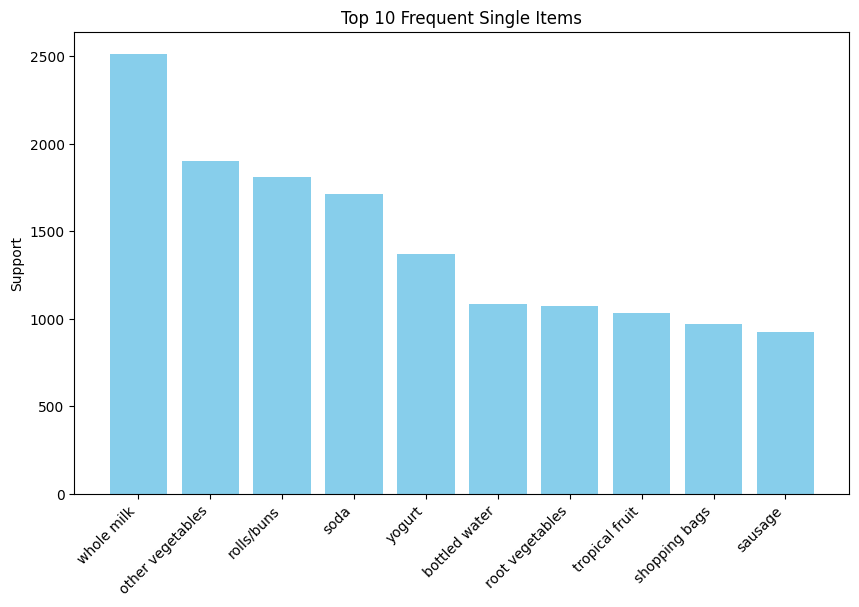

In [ ]:
import matplotlib.pyplot as plt

# Filter only single items
single_items = {k: v for k, v in patterns.items() if len(k) == 1}

# Sort by support and take top 10
top10_single = dict(sorted(single_items.items(), key=lambda x: -x[1])[:10])

# Plot
plt.figure(figsize=(10,6))
plt.bar([k[0] for k in top10_single.keys()], top10_single.values(), color='skyblue')
plt.title('Top 10 Frequent Single Items')
plt.ylabel('Support')
plt.xticks(rotation=45, ha='right')
plt.show()


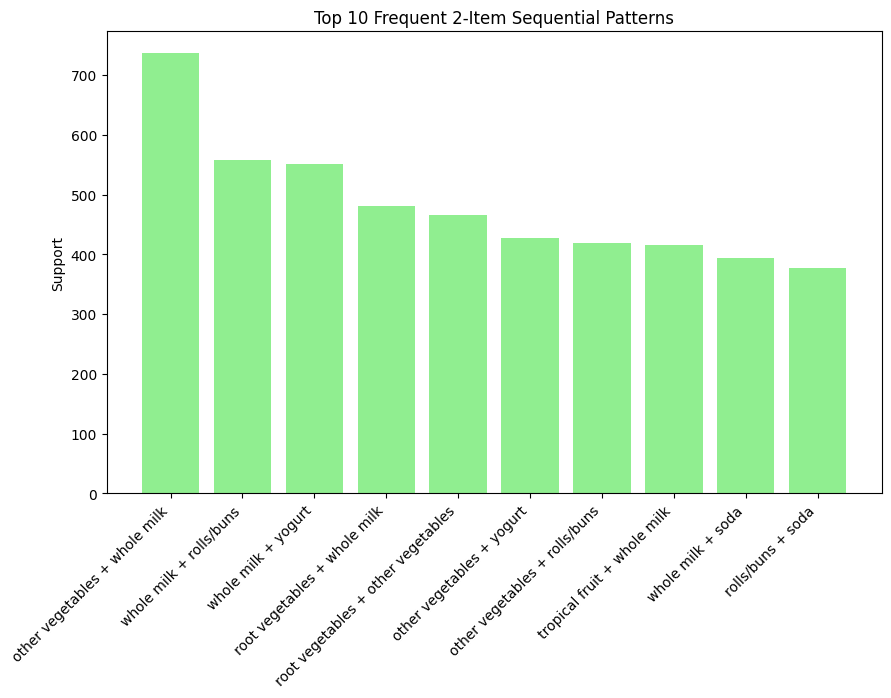

In [ ]:
# Filter only 2-item sequences
two_item_seq = {k: v for k, v in patterns.items() if len(k) == 2}

# Sort by support and take top 10
top10_seq = dict(sorted(two_item_seq.items(), key=lambda x: -x[1])[:10])

# Plot
plt.figure(figsize=(10,6))
plt.bar([' + '.join(k) for k in top10_seq.keys()], top10_seq.values(), color='lightgreen')
plt.title('Top 10 Frequent 2-Item Sequential Patterns')
plt.ylabel('Support')
plt.xticks(rotation=45, ha='right')
plt.show()


Observations

* Whole milk (25.5% of transactions) is the most frequently purchased product → staple item.

* Other vegetables (19%), rolls/buns (18%), and soda (17%) follow closely → everyday essentials and common fast-moving goods.

* Items like yogurt (14%), bottled water (11%), and root vegetables (11%) show strong demand → customers buy both perishable (fresh) and non-perishable (packaged) items regularly.

* Shopping bags (10%) appear frequently → indicates people buy multiple items per trip (not single-item purchases).

* Lower-frequency but still significant items like citrus fruit, bottled beer, canned beer, domestic eggs (6–8%) highlight weekly/occasional purchases.

📊 Inferences

* Core Products Drive Sales

Whole milk, vegetables, buns, and soda are “basket builders” → if these items are in stock, customers are more likely to shop.

* Cross-Selling Potential

1. Since many people buy milk + bread/buns or milk + yogurt, promotions can bundle these items.

2. Beverages (soda, bottled water, beer) are strong cross-sell candidates with snacks or bakery items.

* Store Strategy

1. High-support items should always be well-stocked and prominently placed.

2. Medium-support items (fruits, juice, eggs) can be promoted seasonally or with discounts to increase basket size.

* Customer Behavior Insight

1. Customers are not only buying staples but also a mix of fresh, packaged, and convenience products.

2. Presence of “shopping bags” suggests multi-item shopping trips rather than single purchases.